# Exploratory Data Analysis with Titanic dataset




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
titanic = pd.read_csv('/content/drive/MyDrive/train.csv')


## Exploring the Data :

In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for Duplicates:

In [9]:
duplicates = titanic.duplicated()
duplicated_rows = titanic[duplicates]
duplicated_rows.count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Checking for Missing Values :

In [10]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there is a 177 missing value in the 'Age' feature filled with NAN, i will compute the mean Age per [Pclass, Sex] group on the dataset and then use this information to replace NaN values.

In [27]:
meanAgeTrain = titanic.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
titanic['Age'] = titanic['Age'].fillna(meanAgeTrain)

In [28]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FamilySize       0
dtype: int64

## Exploratory Data Analysis

Distribution of passengers by gender:

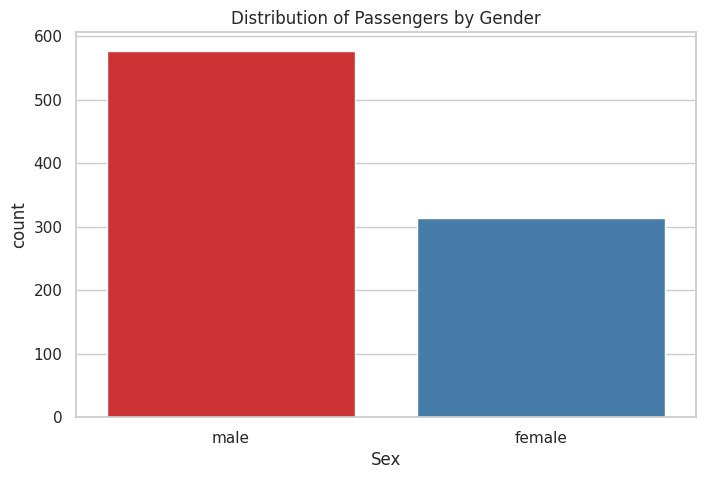

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=titanic, palette='Set1')
plt.title('Distribution of Passengers by Gender')
plt.show()

Distribution of passengers by class:

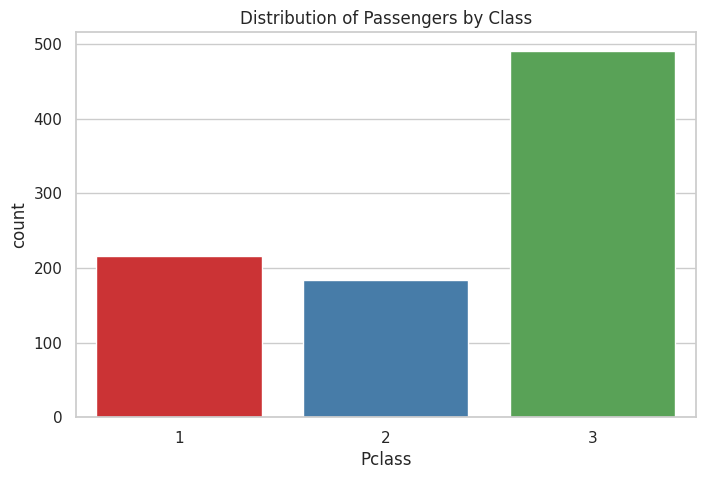

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=titanic, palette='Set1')
plt.title('Distribution of Passengers by Class')
plt.show()

Distribution of passengers by age:

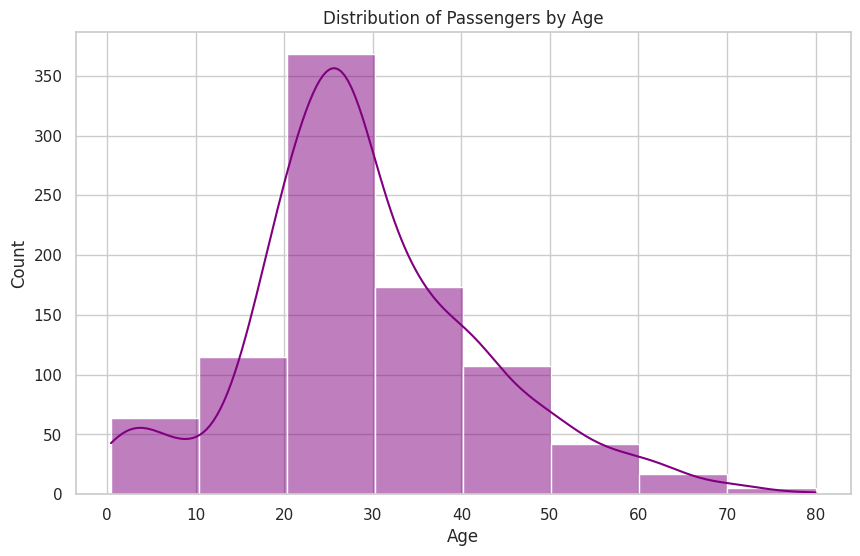

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a darker shade of purple
dark_purple = sns.dark_palette("purple", reverse=True)[0]

# Plot the histogram with darker bins
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'].dropna(), bins=8, kde=True, color=dark_purple)
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.show()


Most of the passengers were 20-30 years old

Overall Survival Rate:

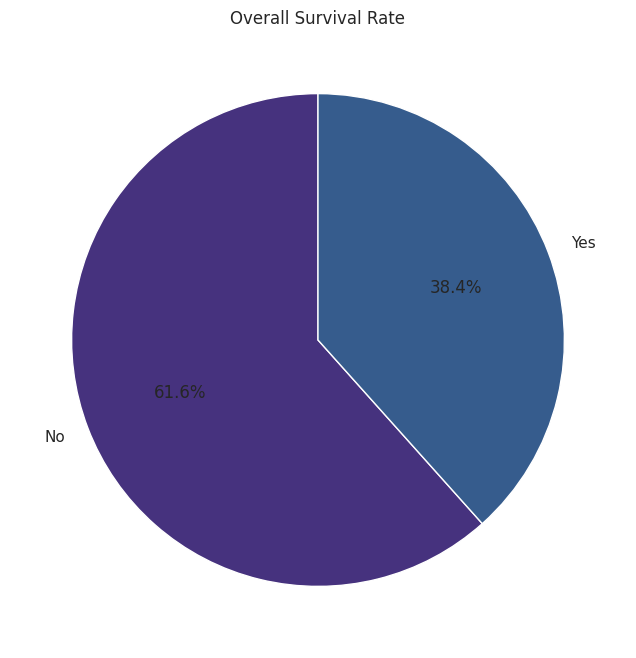

In [66]:
plt.figure(figsize=(8, 8))
survived_counts = titanic['Survived'].value_counts()
labels = ['No', 'Yes']

plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Overall Survival Rate')

plt.show()

From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

### Let's explore the features and extract some insights :

In [15]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [63]:
print('Oldest person Survived was at',titanic['Age'].max(),'years old')
print('Youngest person Survived was at',titanic['Age'].min(),'years old')
print('Average person Survived was at {:.1f} years old'.format(titanic['Age'].mean()))

Oldest person Survived was at 80.0 years old
Youngest person Survived was at 0.42 years old
Average person Survived was at 29.3 years old


Survival Rate by Gender:

In [17]:
from tabulate import tabulate

survival_counts = titanic.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)

survival_counts.columns = ['No', 'Yes']

pretty_table = tabulate(survival_counts, headers='keys', tablefmt='pretty')

print("Survival Count for Each Gender:")
print(pretty_table)



Survival Count for Each Gender:
+--------+-----+-----+
|  Sex   | No  | Yes |
+--------+-----+-----+
| female | 81  | 233 |
|  male  | 468 | 109 |
+--------+-----+-----+


We can see that 233 female survived out of 344. And out of 577 male 109 survived.
The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

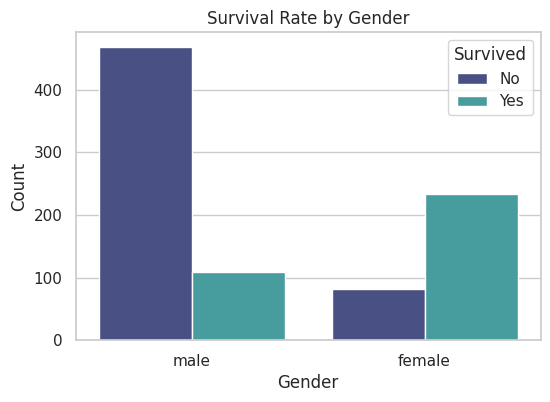

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='mako')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


Survival Rate by Class:

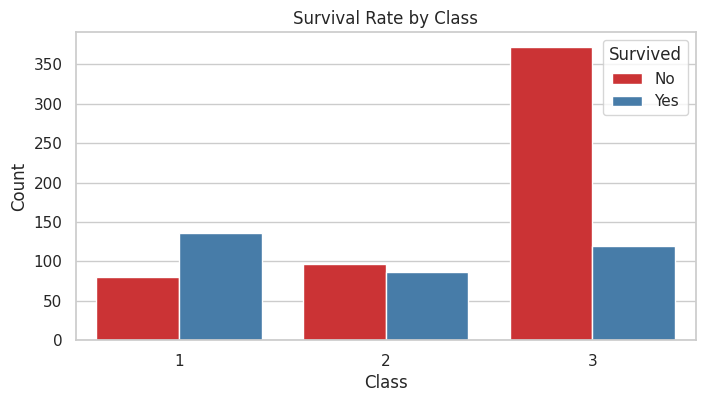

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='Set1')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


It is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. Money can buy anything ?!!!

Survival Rate by Age Group:

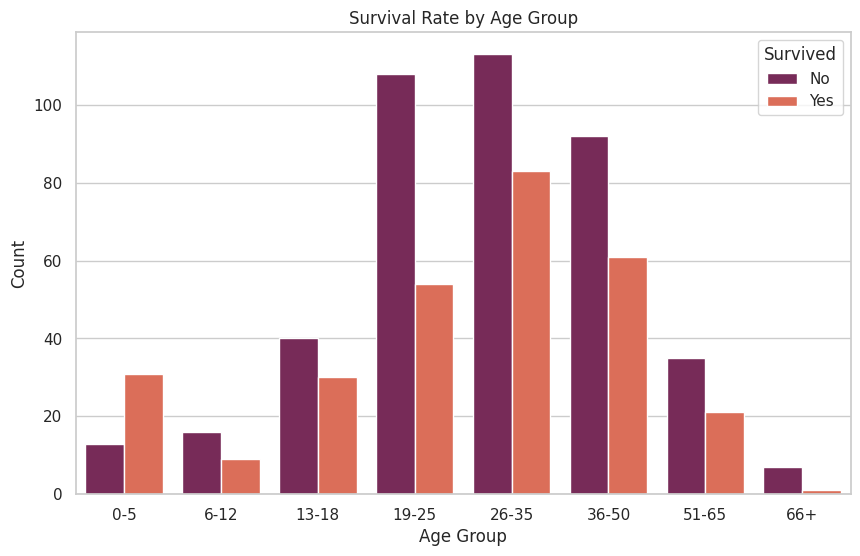

In [20]:
age_bins = [0, 5, 12, 18, 25, 35, 50, 65, 80]
age_labels = ['0-5', '6-12', '13-18', '19-25', '26-35', '36-50', '51-65', '66+']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=titanic, palette='rocket', order=age_labels)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


Correlation Matrix:

<ipython-input-21-e2cb35472154>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr()


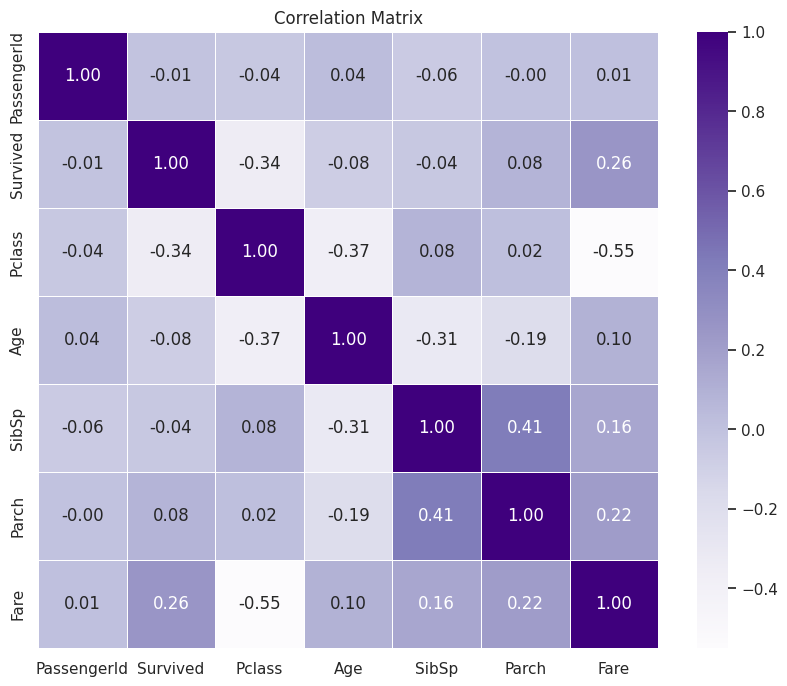

In [21]:
correlation_matrix = titanic.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The most 2 'numeric' features correlated with "Survived" feature are "Pclass" and "Fare"

Family Size Impact on Survival:

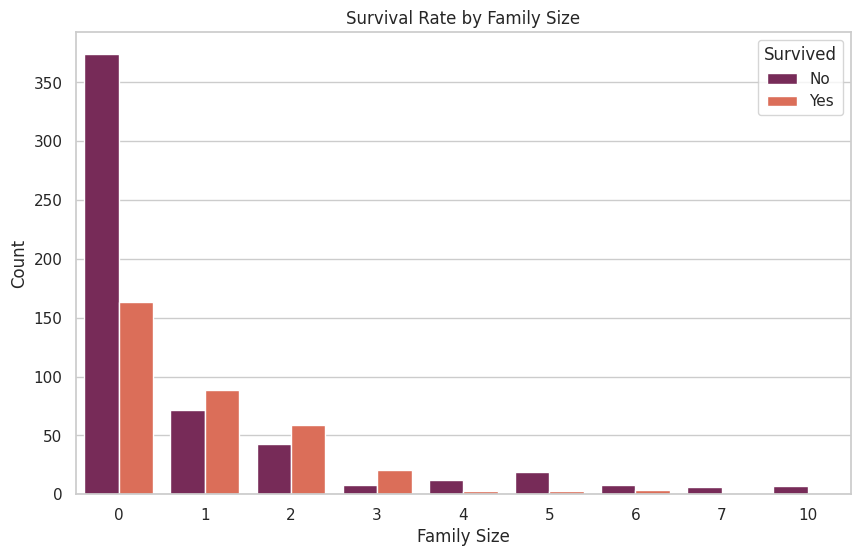

In [23]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=titanic, palette='rocket')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


 We can notice that if a passanger is alone in ship with no siblings, He has a bigger chance to survive. The chance decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself.

Embarked Port Analysis:

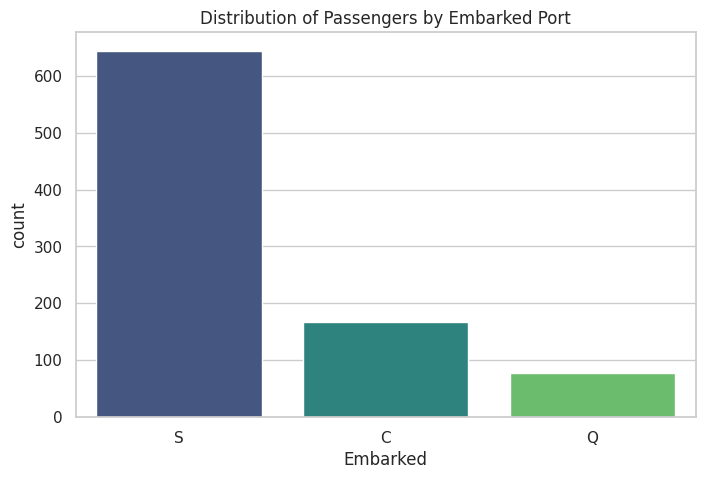

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=titanic, palette='viridis')
plt.title('Distribution of Passengers by Embarked Port')
plt.show()

Majority of the passengers boarded from S. So, the missing values in "Embarked" column can be filled with S.

Survival rate by embarked port :

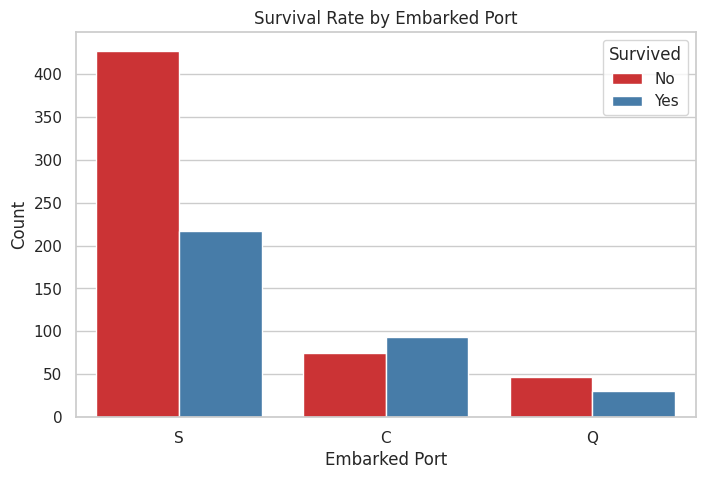

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette='Set1')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

--------------------------------------------------------------------------------

# Done by Mosab Al-Abdulrahman @ 5-December-2023